A. Data Wrangling Challenge

Download the data from here:https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzdClick on "Export" as to download as CSV file

Also download the attachment further down the page: "OPEN_DATA_FIRE_INCIDENTS_FILE_DESCRIPTION.xls"Using these data, please answer the following questions. Do not round the answers.

1. What proportion of FDNY responses corresponds to the most common type of incident?

2. What is the ratio of the average number of units that arrive to a scene of an incident classified as '111 - Building fire' to the number that arrive for '651 - Smoke scare, odor of smoke'?

3. How many times more likely is an incident in Staten Island a false call compared to in Manhattan? The answer should be the ratio of Staten Island false call rate to Manhattan false call rate. A false call is an incident for which 'INCIDENT_TYPE_DESC' is '710 - Malicious, mischievous false call, other'.

4. Check the distribution of the number of minutes it takes between the time a '111 - Building fire' incident has been logged into the Computer Aided Dispatch system and the time at which the first unit arrives on scene. What is the third quartile of that distribution. Note: the number of minutes can be fractional (ie, do not round).

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'C://Users//Abdullah Mohammed//Downloads//Incidents_Responded_to_by_Fire_Companies (1).csv'
df = pd.read_csv(path)
df

C:\Users\Abdullah Mohammed\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (1,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1.0,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186.0,"00 - Action taken, other",...,10454,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55672692,818,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3.0,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769.0,86 - Investigate,...,10036,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1.0,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841.0,"00 - Action taken, other",...,11418,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4.0,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259.0,44 - Hazardous materials leak control & contai...,...,11103,5 - Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55672697,4019,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6.0,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387.0,86 - Investigate,...,11385,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4158387,69503856,4483,735A - Unwarranted alarm/defective condition o...,12/31/2021 11:56:54 PM,01/01/2022 12:02:15 AM,2.0,01/01/2022 12:07:30 AM,11 - First Alarm,636.0,86 - Investigate,...,11355,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4158388,69503858,2362,735A - Unwarranted alarm/defective condition o...,12/31/2021 11:58:41 PM,01/01/2022 12:04:43 AM,1.0,01/01/2022 12:10:01 AM,11 - First Alarm,680.0,86 - Investigate,...,10459,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4158389,69503859,1423,522 - Water or steam leak,12/31/2021 11:59:24 PM,01/01/2022 12:07:13 AM,1.0,01/01/2022 12:20:57 AM,11 - First Alarm,1293.0,64 - Shut down system,...,10035,1 - Manhattan,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4158390,69503860,4607,735A - Unwarranted alarm/defective condition o...,12/31/2021 11:55:39 PM,01/01/2022 12:01:06 AM,2.0,01/01/2022 12:08:46 AM,11 - First Alarm,787.0,86 - Investigate,...,11354,5 - Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158392 entries, 0 to 4158391
Data columns (total 24 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   IM_INCIDENT_KEY               int64  
 1   FIRE_BOX                      object 
 2   INCIDENT_TYPE_DESC            object 
 3   INCIDENT_DATE_TIME            object 
 4   ARRIVAL_DATE_TIME             object 
 5   UNITS_ONSCENE                 float64
 6   LAST_UNIT_CLEARED_DATE_TIME   object 
 7   HIGHEST_LEVEL_DESC            object 
 8   TOTAL_INCIDENT_DURATION       float64
 9   ACTION_TAKEN1_DESC            object 
 10  ACTION_TAKEN2_DESC            object 
 11  ACTION_TAKEN3_DESC            object 
 12  PROPERTY_USE_DESC             object 
 13  STREET_HIGHWAY                object 
 14  ZIP_CODE                      object 
 15  BOROUGH_DESC                  object 
 16  FLOOR                         object 
 17  CO_DETECTOR_PRESENT_DESC      object 
 18  FIRE_ORIGIN_BELOW_GRAD

1. What proportion of FDNY responses corresponds to the most common type of incident?


In [4]:
#Check null values in the INCIDENT_TYPE_DESC column
df[['INCIDENT_TYPE_DESC']].isnull().sum()

INCIDENT_TYPE_DESC    0
dtype: int64

In [5]:
proportion = df[['INCIDENT_TYPE_DESC']].value_counts().max() / df[['INCIDENT_TYPE_DESC']].count()[0]
print("Proportion of FDNY responses corresponds to the most common type of incident: {} %".format(proportion*100))

Proportion of FDNY responses corresponds to the most common type of incident: 37.14832560278107 %


2. What is the ratio of the average number of units that arrive to a scene of an incident classified as '111 - Building fire' to the number that arrive for '651 - Smoke scare, odor of smoke'?

In [6]:
number_of_units_1 = (df[['INCIDENT_TYPE_DESC']] == '111 - Building fire').sum()[0]
number_of_units_2 = (df[['INCIDENT_TYPE_DESC']] == '651 - Smoke scare, odor of smoke').sum()[0]
Ratio = number_of_units_1  / number_of_units_2
print("the ratio of the average number of units that arrive to a scene of an incident classified as '111 - Building fire' to the number that arrive for '651 - Smoke scare, odor of smoke':  {} %".format(Ratio*100))

the ratio of the average number of units that arrive to a scene of an incident classified as '111 - Building fire' to the number that arrive for '651 - Smoke scare, odor of smoke':  8.99883245767659 %


3. How many times more likely is an incident in Staten Island a false call compared to in Manhattan? The answer should be the ratio of Staten Island false call rate to Manhattan false call rate. A false call is an incident for which 'INCIDENT_TYPE_DESC' is '710 - Malicious, mischievous false call, other'.


In [7]:
df['BOROUGH_DESC'].value_counts()

4 - Brooklyn         1211992
1 - Manhattan        1033794
2 - Bronx             852978
5 - Queens            842765
3 - Staten Island     216863
Name: BOROUGH_DESC, dtype: int64

In [8]:
original_df_rows_count = df.shape[0]
Manhattan_false_call_count = df[(df['BOROUGH_DESC'] == '1 - Manhattan') & (df['INCIDENT_TYPE_DESC'] == '710 - Malicious, mischievous false call, other')].shape[0]
StatenIsland_false_call_count = df[(df['BOROUGH_DESC'] == '3 - Staten Island') & (df['INCIDENT_TYPE_DESC'] == '710 - Malicious, mischievous false call, other')].shape[0]
Manhattan_false_call_rate =  Manhattan_false_call_count / original_df_rows_count
StatenIsland_false_call_rate = StatenIsland_false_call_count / original_df_rows_count
No_of_times = Manhattan_false_call_rate / StatenIsland_false_call_rate
print("Number of times more likely is an incident in Staten Island a false call compared to in Manhattan: ", No_of_times)

Number of times more likely is an incident in Staten Island a false call compared to in Manhattan:  3.0297029702970297


4. Check the distribution of the number of minutes it takes between the time a '111 - Building fire' incident has been logged into the Computer Aided Dispatch system and the time at which the first unit arrives on scene. What is the third quartile of that distribution. Note: the number of minutes can be fractional (ie, do not round).

In [9]:
df[df['INCIDENT_TYPE_DESC'] == '111 - Building fire']

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
91,55672965,2595,111 - Building fire,01/01/2013 12:58:10 AM,01/01/2013 01:00:50 AM,15.0,01/01/2013 04:15:20 AM,7 - Signal 7-5,11830.0,11 - Extinguishment by fire service personnel,...,11219,4 - Brooklyn,NaN,NaN,NaN,1.0,5 - Beyond building of origin,N - None present,N - None Present,0.0
199,55673299,2591,111 - Building fire,01/01/2013 02:22:56 AM,01/01/2013 02:25:23 AM,9.0,01/01/2013 07:29:44 AM,7 - Signal 7-5,18408.0,11 - Extinguishment by fire service personnel,...,10456,2 - Bronx,4,NaN,NaN,4.0,3 - Confined to floor of origin,N - None present,N - None Present,0.0
440,55673870,1601,111 - Building fire,01/01/2013 06:20:49 AM,01/01/2013 06:26:13 AM,23.0,01/01/2013 10:32:28 AM,2 - 2nd alarm,15099.0,11 - Extinguishment by fire service personnel,...,10030,1 - Manhattan,6,NaN,NaN,6.0,4 - Confined to building of origin,N - None present,N - None Present,0.0
492,55674012,7973,111 - Building fire,01/01/2013 07:59:48 AM,01/01/2013 08:03:33 AM,6.0,01/01/2013 08:19:37 AM,"1 - More than initial alarm, less than Signal 7-5",1189.0,11 - Extinguishment by fire service personnel,...,11373,5 - Queens,3rd,NaN,NaN,3.0,1 - Confined to object of origin,N - None present,N - None Present,0.0
569,55674170,1726,111 - Building fire,01/01/2013 09:47:27 AM,01/01/2013 09:49:25 AM,13.0,01/01/2013 11:11:42 AM,7 - Signal 7-5,5055.0,11 - Extinguishment by fire service personnel,...,11207,4 - Brooklyn,NaN,NaN,NaN,5.0,2 - Confined to room of origin,N - None present,N - None Present,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4158000,69502934,4322,111 - Building fire,12/31/2021 06:29:44 PM,12/31/2021 06:35:07 PM,16.0,12/31/2021 09:53:28 PM,75 - All Hands Working,12224.0,11 - Extinguishment by fire service personnel,...,10461,2 - Bronx,cellar,NaN,1.0,1.0,2 - Confined to room of origin,N - None present,N - None Present,0.0
4158057,69503074,2463,111 - Building fire,12/31/2021 07:15:22 PM,12/31/2021 07:17:19 PM,15.0,12/31/2021 07:58:56 PM,75 - All Hands Working,2614.0,11 - Extinguishment by fire service personnel,...,11226,4 - Brooklyn,2,NaN,NaN,2.0,1 - Confined to object of origin,N - None present,N - None Present,0.0
4158191,69503387,1512,111 - Building fire,12/31/2021 09:14:22 PM,12/31/2021 09:20:10 PM,6.0,12/31/2021 09:58:44 PM,11 - First Alarm,2662.0,11 - Extinguishment by fire service personnel,...,10027,1 - Manhattan,4,NaN,NaN,4.0,1 - Confined to object of origin,1 - Present,1 - Present,1.0
4158237,69503496,3398,111 - Building fire,12/31/2021 09:55:53 PM,12/31/2021 09:59:23 PM,16.0,01/01/2022 12:16:00 AM,75 - All Hands Working,8407.0,11 - Extinguishment by fire service personnel,...,10458,2 - Bronx,NaN,NaN,NaN,4.0,4 - Confined to building of origin,N - None present,N - None Present,0.0


In [10]:
df['INCIDENT_DATE_TIME'] = pd.to_datetime(df['INCIDENT_DATE_TIME'])
df['ARRIVAL_DATE_TIME'] = pd.to_datetime(df['ARRIVAL_DATE_TIME'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158392 entries, 0 to 4158391
Data columns (total 24 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   IM_INCIDENT_KEY               int64         
 1   FIRE_BOX                      object        
 2   INCIDENT_TYPE_DESC            object        
 3   INCIDENT_DATE_TIME            datetime64[ns]
 4   ARRIVAL_DATE_TIME             datetime64[ns]
 5   UNITS_ONSCENE                 float64       
 6   LAST_UNIT_CLEARED_DATE_TIME   object        
 7   HIGHEST_LEVEL_DESC            object        
 8   TOTAL_INCIDENT_DURATION       float64       
 9   ACTION_TAKEN1_DESC            object        
 10  ACTION_TAKEN2_DESC            object        
 11  ACTION_TAKEN3_DESC            object        
 12  PROPERTY_USE_DESC             object        
 13  STREET_HIGHWAY                object        
 14  ZIP_CODE                      object        
 15  BOROUGH_DESC                  ob

In [11]:
df_T = df[df['INCIDENT_TYPE_DESC'] == '111 - Building fire'][['ARRIVAL_DATE_TIME']]  
df_T['INCIDENT_DATE_TIME'] = df[df['INCIDENT_TYPE_DESC'] == '111 - Building fire'][['INCIDENT_DATE_TIME']]  
df_T

,ARRIVAL_DATE_TIME,INCIDENT_DATE_TIME
91,2013-01-01 01:00:50,2013-01-01 00:58:10
199,2013-01-01 02:25:23,2013-01-01 02:22:56
440,2013-01-01 06:26:13,2013-01-01 06:20:49
492,2013-01-01 08:03:33,2013-01-01 07:59:48
569,2013-01-01 09:49:25,2013-01-01 09:47:27
...,...,...
4158000,2021-12-31 18:35:07,2021-12-31 18:29:44
4158057,2021-12-31 19:17:19,2021-12-31 19:15:22
4158191,2021-12-31 21:20:10,2021-12-31 21:14:22
4158237,2021-12-31 21:59:23,2021-12-31 21:55:53


In [12]:
df_T['Difference'] = df_T['ARRIVAL_DATE_TIME'] - df_T['INCIDENT_DATE_TIME'] 
df_T

,ARRIVAL_DATE_TIME,INCIDENT_DATE_TIME,Difference
91,2013-01-01 01:00:50,2013-01-01 00:58:10,0 days 00:02:40
199,2013-01-01 02:25:23,2013-01-01 02:22:56,0 days 00:02:27
440,2013-01-01 06:26:13,2013-01-01 06:20:49,0 days 00:05:24
492,2013-01-01 08:03:33,2013-01-01 07:59:48,0 days 00:03:45
569,2013-01-01 09:49:25,2013-01-01 09:47:27,0 days 00:01:58
...,...,...,...
4158000,2021-12-31 18:35:07,2021-12-31 18:29:44,0 days 00:05:23
4158057,2021-12-31 19:17:19,2021-12-31 19:15:22,0 days 00:01:57
4158191,2021-12-31 21:20:10,2021-12-31 21:14:22,0 days 00:05:48
4158237,2021-12-31 21:59:23,2021-12-31 21:55:53,0 days 00:03:30


In [13]:
Diff_in_minutes = df_T[['Difference']]/pd.Timedelta('60s')
Diff_in_minutes

,Difference
91,2.666667
199,2.450000
440,5.400000
492,3.750000
569,1.966667
...,...
4158000,5.383333
4158057,1.950000
4158191,5.800000
4158237,3.500000


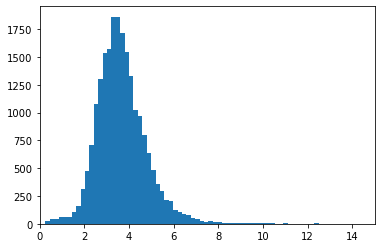

In [14]:
import matplotlib.pyplot as plt
plt.xlim(0,15)
t = plt.hist(Diff_in_minutes,bins = 1000)


In [15]:
#Third quartile
Diff_in_minutes.quantile([0.75])

,Difference
0.75,4.266667


part B.1)  Water the Trees problem in codeforces

time limit per test: 3 seconds

memory limit per test: 256 megabytes

input: standard input

output: standard output

There are n trees in a park, numbered from 1 to n. The initial height of the i-th tree is hi.

You want to water these trees, so they all grow to the same height.

The watering process goes as follows. You start watering trees at day 1. During the j-th day you can:

Choose a tree and water it. If the day is odd (e.g. 1,3,5,7,…), then the height of the tree increases by 1. If the day is even (e.g. 2,4,6,8,…), then the height of the tree increases by 2.
Or skip a day without watering any tree.

Note that you can't water more than one tree in a day.

Your task is to determine the minimum number of days required to water the trees so they grow to the same height.

You have to answer t independent test cases.

Input

The first line of the input contains one integer t (1≤t≤2⋅104) — the number of test cases.

The first line of the test case contains one integer n (1≤n≤3⋅105) — the number of trees.

The second line of the test case contains n integers h1,h2,…,hn (1≤hi≤109), where hi is the height of the i-th tree.

It is guaranteed that the sum of n over all test cases does not exceed 3⋅105 (∑n≤3⋅105).

Output

For each test case, print one integer — the minimum number of days required to water the trees, so they grow to the same height.

Example

inputCopy

3

3

1 2 4

5

4 4 3 5 5

7

2 5 4 8 3 7 4

outputCopy

4

3

16

Note
Consider the first test case of the example. The initial state of the trees is [1,2,4].

During the first day, let's water the first tree, so the sequence of heights becomes [2,2,4];

during the second day, let's water the second tree, so the sequence of heights becomes [2,4,4];

let's skip the third day;

during the fourth day, let's water the first tree, so the sequence of heights becomes [4,4,4].

Thus, the answer is 4.



In [16]:
NumberOfTestCases = int(input('Enter the number of test cases: '))

def Problem1661C():
    NumberOfTrees = int(input('Enter the number of trees: '))
    #This array to take input heights from the user 
    heights = list(input('Enter the heights of trees: ').split())
    heights = [int(x) for x in heights]
    MaxHeight = max(heights)
    days = 0
    heights.sort(reverse=True)
    
    #Check that the equality of all heights doesn't happen
    while not all(elem == heights[0] for elem in heights):
        days+=1
        for i in range(len(heights)) :
            if (heights[i]!=MaxHeight):
                if heights[i]+2 <= MaxHeight and days%2==0:
                    heights[i]+=2
                    break
                elif heights[i]+2 != MaxHeight and heights[i]+1 <= MaxHeight and days%2==1:
                    heights[i]+=1
                    break
    print('The number of days to make all trees of equal heights is: <{}> and the height of each tree is <{}>'.format(days, heights[0]))
    print('_____________________________________________________________________________________________________')
    return days
ResultList=[]

# Run the program for number of in-out pairs
for i in range(NumberOfTestCases):
    ResultList.append(Problem1661C())
    
print("Summarized results of all test cases:")
for i in range(NumberOfTestCases):
    print(ResultList[i])

Enter the number of test cases: 3
Enter the number of trees: 3
Enter the heights of trees: 1 2 4
The number of days to make all trees of equal heights is: <4> and the height of each tree is <4>
_____________________________________________________________________________________________________
Enter the number of trees: 5
Enter the heights of trees: 4 4 3 5 5
The number of days to make all trees of equal heights is: <3> and the height of each tree is <5>
_____________________________________________________________________________________________________
Enter the number of trees: 7
Enter the heights of trees: 2 5 4 8 3 7 4
The number of days to make all trees of equal heights is: <16> and the height of each tree is <8>
_____________________________________________________________________________________________________
Summarized results of all test cases:
4
3
16


Part B.2) Construct a Rectangle

time limit per test: 2 seconds

memory limit per test: 256 megabytes

input: standard input

output: standard output

There are three sticks with integer lengths l1,l2 and l3.

You are asked to break exactly one of them into two pieces in such a way that:

both pieces have positive (strictly greater than 0) integer length;

the total length of the pieces is equal to the original length of the stick;

it's possible to construct a rectangle from the resulting four sticks such that each stick is used as exactly one of its sides.

A square is also considered a rectangle.

Determine if it's possible to do that.

Input
The first line contains a single integer t (1≤t≤104) — the number of testcases.

The only line of each testcase contains three integers l1,l2,l3 (1≤li≤108) — the lengths of the sticks.

Output
For each testcase, print "YES" if it's possible to break one of the sticks into two pieces with positive integer length in such 
a way that it's possible to construct a rectangle from the resulting four sticks. Otherwise, print "NO".

You may print every letter in any case you want (so, for example, the strings yEs, yes, Yes and YES are all recognized as a positive answer).

Example
inputCopy

4

6 1 5

2 5 2

2 4 2

5 5 4

outputCopy

YES

NO

YES

YES

Note

In the first testcase, the first stick can be broken into parts of length 1 and 5. We can construct a rectangle with opposite 
sides of length 1 and 5.

In the second testcase, breaking the stick of length 2 can only result in sticks of lengths 1,1,2,5, which can't be made into a rectangle. Breaking the stick of length 5 can produce results 2,3 or 1,4 but neither of them can't be put into a rectangle.

In the third testcase, the second stick can be broken into parts of length 2 and 2. The resulting rectangle has opposite sides 2 and 2 (which is a square).

In the fourth testcase, the third stick can be broken into parts of length 2 and 2. The resulting rectangle has opposite sides 2 and 5.

In [17]:
import numpy as np
NumberOfTestCases = int(input('Enter number of test cases: '))
def Problem1622A():
    #Input List of three lengths from user
    Lengths = list(input("Enter three lengths: ").split(' '))
    Lengths = [int(x) for x in Lengths]
    
    ResidualIndeciesMax = [f for f in range(len(Lengths)) if f!=np.argmax(Lengths)]
    ResidualIndeciesMin = [f for f in range(len(Lengths)) if f!=np.argmin(Lengths)]
    
    if max(Lengths)%2 == 0 and Lengths[ResidualIndeciesMax[0]] == Lengths[ResidualIndeciesMax[1]]:
        return "YES"
    elif min(Lengths)%2 == 0 and Lengths[ResidualIndeciesMin[0]] == Lengths[ResidualIndeciesMin[1]]:
        return "YES"
    elif (max(Lengths) - Lengths[ResidualIndeciesMax[1]]) == Lengths[ResidualIndeciesMax[0]]:
        return "YES"
    else:
        return "NO"

ResultList=[]
for i in range(NumberOfTestCases):
    print("Could you construct a rectangle ? ", Problem1622A())
    print("______________________________")

Enter number of test cases: 4
Enter three lengths: 6 1 5
Could you construct a rectangle ?  YES
______________________________
Enter three lengths: 2 5 2
Could you construct a rectangle ?  NO
______________________________
Enter three lengths: 2 4 2
Could you construct a rectangle ?  YES
______________________________
Enter three lengths: 5 5 4
Could you construct a rectangle ?  YES
______________________________
